# **Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.**

Andrea Vianey Díaz Álvarez 
A01750147


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **Importación de datos**

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


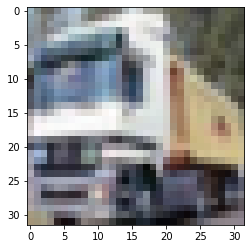

label : truck


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Ejemplo una Imagen
plt.imshow(x_train[1])
plt.show()
print(f"label : {labels[int(y_train[1])]}")

## **Modelo CNN**

In [ ]:
model = Sequential([
    Conv2D(100, kernel_size=(3, 3), padding='same', strides = 1, activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2, 2), strides = 2),
    Conv2D(100, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 100)       2800      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 100)       90100     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 100)        0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 7, 7, 100)         0         
                                                                 
 flatten_15 (Flatten)        (None, 4900)            

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
Batch_size = 120
Epochs = 30

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=[acc, mae])
history = model.fit(x_train[...,np.newaxis],y_train, batch_size= Batch_size, epochs= Epochs)

print(model.loss)
print(model.optimizer)
print(model.metrics_names)
print(model.optimizer.learning_rate)

Epoch 1/30
417/417 [==============================] - 5s 10ms/step - loss: 1.6137 - sparse_categorical_accuracy: 0.4250 - mean_absolute_error: 4.4200
Epoch 2/30
417/417 [==============================] - 4s 10ms/step - loss: 1.2597 - sparse_categorical_accuracy: 0.5602 - mean_absolute_error: 4.4200
Epoch 3/30
417/417 [==============================] - 4s 10ms/step - loss: 1.1271 - sparse_categorical_accuracy: 0.6094 - mean_absolute_error: 4.4200
Epoch 4/30
417/417 [==============================] - 4s 10ms/step - loss: 1.0409 - sparse_categorical_accuracy: 0.6418 - mean_absolute_error: 4.4200
Epoch 5/30
417/417 [==============================] - 4s 10ms/step - loss: 0.9812 - sparse_categorical_accuracy: 0.6604 - mean_absolute_error: 4.4200
Epoch 6/30
417/417 [==============================] - 4s 10ms/step - loss: 0.9383 - sparse_categorical_accuracy: 0.6782 - mean_absolute_error: 4.4200
Epoch 7/30
417/417 [==============================] - 4s 10ms/step - loss: 0.8992 - sparse_categoric

## **Resultados**

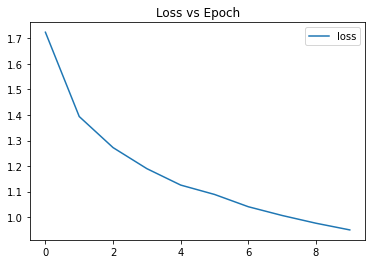

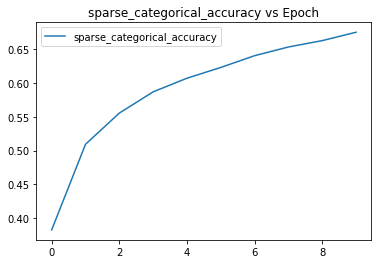

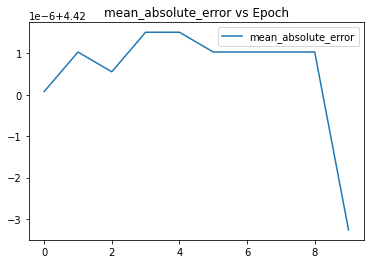

In [ ]:
df = pd.DataFrame(history.history)
df.plot( y = "loss", title = "Loss vs Epoch")
df.plot( y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs Epoch")
df.plot( y = "mean_absolute_error", title = "mean_absolute_error vs Epoch")

## **Evaluación**

In [ ]:
loss, accuracy, mae = model.evaluate(x_test[...,np.newaxis], y_test)
print("loss", loss)
print("acc", accuracy)
print("mae", mae)

313/313 [==============================] - 1s 4ms/step - loss: 0.7988 - sparse_categorical_accuracy: 0.7399 - mean_absolute_error: 4.4200
loss 0.7988223433494568
acc 0.7398999929428101
mae 4.4199981689453125


## **Predicciones**

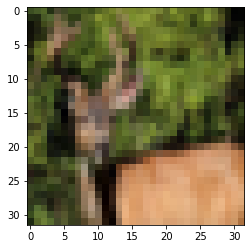

Label: deer
1/1 [==============================] - 0s 50ms/step
Predicción del modelo:  deer


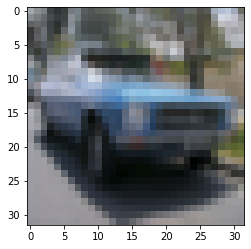

Label: automobile
1/1 [==============================] - 0s 17ms/step
Predicción del modelo:  automobile


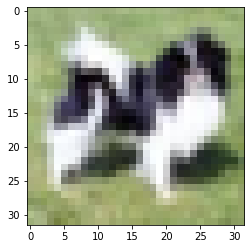

Label: dog
1/1 [==============================] - 0s 25ms/step
Predicción del modelo:  dog


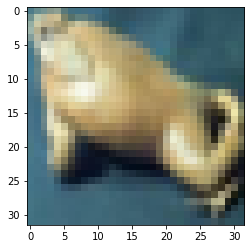

Label: frog
1/1 [==============================] - 0s 18ms/step
Predicción del modelo:  frog


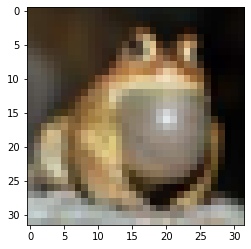

Label: frog
1/1 [==============================] - 0s 19ms/step
Predicción del modelo:  frog


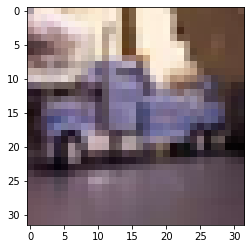

Label: truck
1/1 [==============================] - 0s 17ms/step
Predicción del modelo:  truck


In [ ]:
from tables import Column
for i in range(6):
  random_inx = np.random.choice(x_test.shape[0])
  test_image = x_test[random_inx]
  plt.imshow(test_image)
  plt.show()
  print(f"Label: {labels[int(y_test[random_inx])]}")
  #Prediccion
  pred = model.predict(test_image[np.newaxis,...,np.newaxis])
  print("Predicción del modelo: ", labels[np.argmax(pred)])